<a href="https://colab.research.google.com/github/rtajeong/Hallym_univ_M34/blob/main/hallym_lab6_ridge_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# data to train and test
!curl -L https://bit.ly/2HsDP2p -o train.csv
!curl -L https://bit.ly/2WgqtdO -o test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146  100   146    0     0   3476      0 --:--:-- --:--:-- --:--:--  3476
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  849k  100  849k    0     0   550k      0  0:00:01  0:00:01 --:--:-- 19.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0   4833      0 --:--:-- --:--:-- --:--:--  4833
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  515k  100  515k    0     0   398k      0  0:00:01  0:00:01 --:--:-- 4237k


In [59]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [62]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
train_df.shape, test_df.shape

((8523, 12), (5681, 11))

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [65]:
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [66]:
# assume you decided to use average for missing Weight
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(), inplace=True)               

In [67]:
# assume you decided to use Small for missing outlet size
train_df['Outlet_Size'].fillna('Small', inplace=True)

In [68]:
# let's change Visibility=0 to avearge 
train_df['Item_Visibility'] = train_df['Item_Visibility'].replace(0,train_df['Item_Visibility'].mean() )

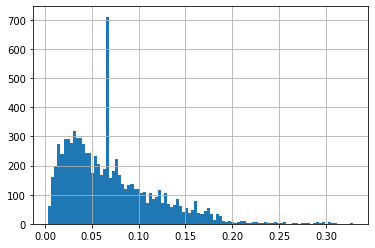

In [69]:
train_df['Item_Visibility'].hist(bins=100)

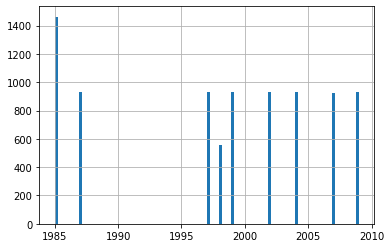

In [70]:
train_df['Outlet_Establishment_Year'].hist(bins=100)

In [71]:
# let's change Establishment_Year to How_old
train_df['Outlet_Establishment_Year'] = 2013 - train_df['Outlet_Establishment_Year']

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [73]:
train_df.drop('Item_Identifier', axis=1, inplace=True)

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [75]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


In [76]:
# categorical data -> numbers (Encoding)
train_df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [77]:
object_list = train_df.select_dtypes(include=['object']).columns

In [78]:
object_list

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [79]:
dummies = pd.get_dummies(train_df[object_list], prefix=object_list)

In [80]:
dummies.head().T

,0,1,2,3,4
Item_Fat_Content_LF,0,0,0,0,0
Item_Fat_Content_Low Fat,1,0,1,0,1
Item_Fat_Content_Regular,0,1,0,1,0
Item_Fat_Content_low fat,0,0,0,0,0
Item_Fat_Content_reg,0,0,0,0,0
Item_Type_Baking Goods,0,0,0,0,0
Item_Type_Breads,0,0,0,0,0
Item_Type_Breakfast,0,0,0,0,0
Item_Type_Canned,0,0,0,0,0
Item_Type_Dairy,1,0,0,0,0


In [81]:
X1 = train_df.drop(object_list, axis=1)

In [82]:
X1, y = X1.drop('Item_Outlet_Sales', axis=1), X1['Item_Outlet_Sales']

In [83]:
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,14
1,5.92,0.019278,48.2692,4
2,17.50,0.016760,141.6180,14
3,19.20,0.066132,182.0950,15
4,8.93,0.066132,53.8614,26


In [84]:
# we should do scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [85]:
X1[:5]

array([[-0.84187169, -1.11135787,  1.74745381, -0.13954076],
       [-1.64170589, -1.04506727, -1.48902325, -1.33410274],
       [ 1.09855449, -1.09673346,  0.01004021, -0.13954076],
       [ 1.50083796, -0.08373973,  0.66004955, -0.02008456],
       [-0.9294275 , -0.08373973, -1.39921961,  1.29393362]])

In [86]:
dummies.shape, X1.shape

((8523, 41), (8523, 4))

In [87]:
X2 = pd.concat([pd.DataFrame(X1), dummies], axis=1)

In [88]:
X2.shape

(8523, 45)

In [89]:
X2.shape, y.shape

((8523, 45), (8523,))

In [90]:
X2.head()

,0,1,2,3,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,-1.111358,1.747454,-0.139541,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,-1.641706,-1.045067,-1.489023,-1.334103,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,1.098554,-1.096733,0.010040,-0.139541,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,1.500838,-0.083740,0.660050,-0.020085,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,-0.929428,-0.083740,-1.399220,1.293934,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [91]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## So far, we have done data cleaning (preprocessing)
## Now, data is ready !!!

In [93]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)
lreg = LinearRegression()
lreg.fit(X_train, y_train)
lreg.score(X_test, y_test)

0.5521202138260259

In [96]:
lreg.coef_

array([-4.10174381e+00, -3.23945135e-01,  9.70448048e+02, -7.40166028e+14,
        1.30758352e+15,  1.30758352e+15,  1.30758352e+15,  1.30758352e+15,
        1.30758352e+15, -3.96932122e+12, -3.96932122e+12, -3.96932122e+12,
       -3.96932122e+12, -3.96932122e+12, -3.96932122e+12, -3.96932122e+12,
       -3.96932122e+12, -3.96932122e+12, -3.96932122e+12, -3.96932122e+12,
       -3.96932122e+12, -3.96932122e+12, -3.96932122e+12, -3.96932122e+12,
       -3.96932122e+12, -9.75888238e+14, -9.25108195e+13, -2.27367756e+15,
       -1.99735390e+15, -3.45918685e+14, -7.92771906e+13, -2.00842530e+15,
       -1.83159046e+15, -2.39149456e+15, -6.83210744e+14,  5.56403818e+13,
       -9.34125633e+14,  9.50993020e+14, -1.39134724e+15, -2.39333844e+15,
       -1.91080414e+15, -2.36913357e+15, -1.38456673e+15, -4.35140868e+14,
       -2.31199508e+14])

In [97]:
pd.Series(lreg.coef_, index=X2.columns)

0                                 -4.101744e+00
1                                 -3.239451e-01
2                                  9.704480e+02
3                                 -7.401660e+14
Item_Fat_Content_LF                1.307584e+15
Item_Fat_Content_Low Fat           1.307584e+15
Item_Fat_Content_Regular           1.307584e+15
Item_Fat_Content_low fat           1.307584e+15
Item_Fat_Content_reg               1.307584e+15
Item_Type_Baking Goods            -3.969321e+12
Item_Type_Breads                  -3.969321e+12
Item_Type_Breakfast               -3.969321e+12
Item_Type_Canned                  -3.969321e+12
Item_Type_Dairy                   -3.969321e+12
Item_Type_Frozen Foods            -3.969321e+12
Item_Type_Fruits and Vegetables   -3.969321e+12
Item_Type_Hard Drinks             -3.969321e+12
Item_Type_Health and Hygiene      -3.969321e+12
Item_Type_Household               -3.969321e+12
Item_Type_Meat                    -3.969321e+12
Item_Type_Others                  -3.969

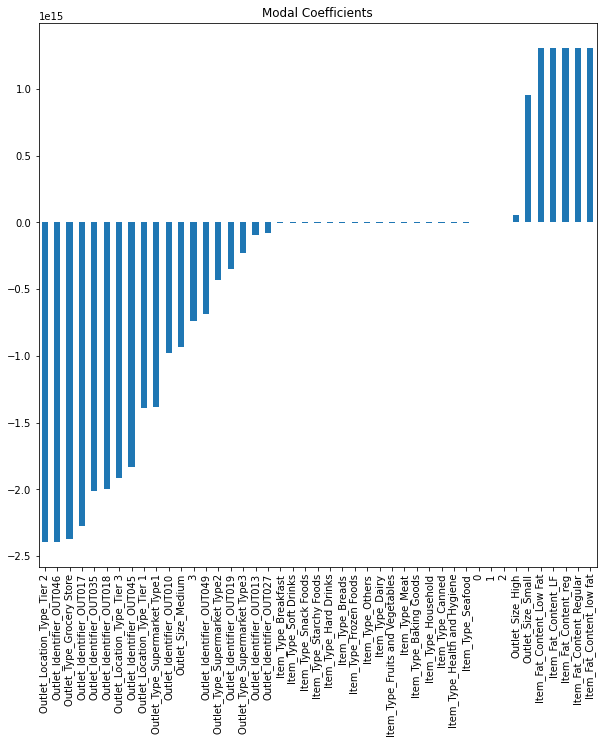

In [98]:
# checking the magnitudes of coefficients
plt.figure(figsize=(10,10))
predictors = X2.columns
coef = pd.Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [111]:
# Ridge 
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha = 0.02, normalize=True)
ridgereg.fit(X_train, y_train)
ridgereg.score(X_test, y_test)

0.5521529934614595

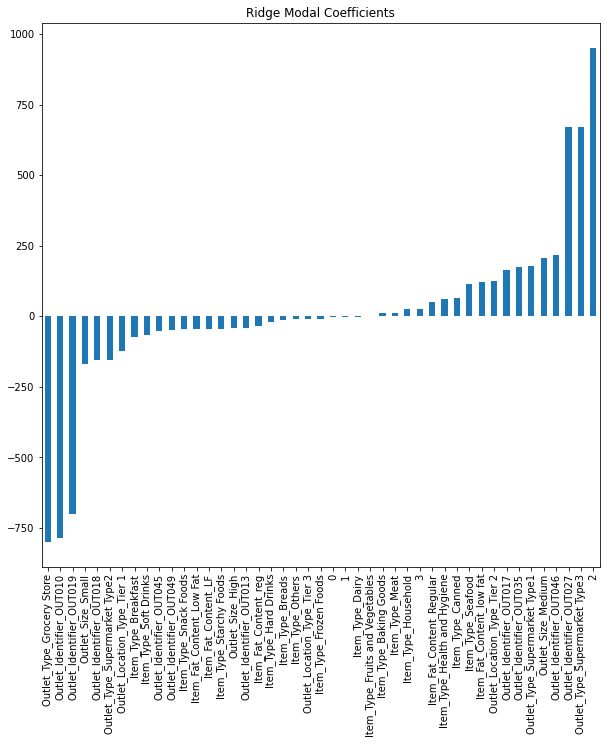

In [112]:
plt.figure(figsize=(10,10))
predictors = X2.columns
coef = pd.Series(ridgereg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

In [104]:
# Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha = 0.2, normalize=True)
lassoreg.fit(X_train, y_train)
lassoreg.score(X_test, y_test)

0.55475344234431

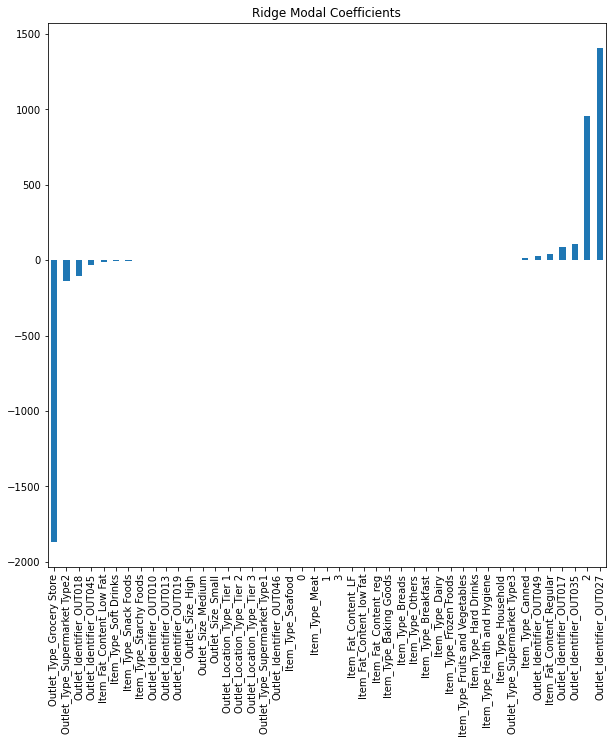

In [105]:
plt.figure(figsize=(10,10))
predictors = X2.columns
coef = pd.Series(lassoreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')